In [1]:
import feather
import re

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

In [2]:
train = feather.read_dataframe('NN\\train')
test = feather.read_dataframe('NN\\test')


#target = pd.read_csv('target2',header=None,index_col=0)

In [4]:
################ NN Data normalization ##########################
# concated = pd.concat([train,test],axis=0)

# def PProc(df,na_col=True,outliner_col=True):
#     def quantile_outliner(df,x):
#         Q1 = df[x].quantile(0.25)
#         Q3 = df[x].quantile(0.75)
#         IQR = (Q3 - Q1)
#         return (df[x] < (Q1 - 1.5*IQR)) | (df[x] > (Q3 + 1.5*IQR))
    
#     df_cols = [x for x in df.columns.values if np.issubdtype(df[x],np.number)]
#     cats =  [x for x in df_cols if (re.search('feature_[1-2]$',x) or re.match('last_purchase_month_bins',x) or re.search('modeplus$',x) or re.match('purchase_size_bins',x))] + ['last_payments_month','last_payments_year']
#     non_cats = set(df_cols) - set(cats)
    
#     for x in non_cats:
#         NA = df[x].isna()
#         if outliner_col:
#             df[x+'otlrs'] = quantile_outliner(df,x)
            
#         if (na_col and NA.sum()):
#             df[x+'NAs'] = NA
        
#         df[x].fillna(df[x].median())
#         df[x] = preprocessing.RobustScaler(with_centering=False).fit_transform(df[x][:,None])
    
#     for x in cats:
#         df[x] = df[x].fillna(0).astype(np.int16)
#     return pd.get_dummies(df,columns=cats)

# concated = PProc(concated)
# train,test = concated.iloc[:201917,:],concated.iloc[201917:,:]
# del concated
# train['target'] = target
# feather.write_dataframe(train,'NN\\train')
# feather.write_dataframe(test,'NN\\test')

In [3]:
train_dataset = train.sample(frac=0.8)
test_dataset = train.drop(train_dataset.index)

In [4]:
train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')

In [5]:
del train

In [7]:
to_drop = [x for x in train_dataset.columns.values if not (np.issubdtype(train_dataset[x],np.number) or np.issubdtype(train_dataset[x],np.bool_))]

In [8]:
train_dataset.drop(to_drop,axis=1,inplace=True)
test_dataset.drop(to_drop,axis=1,inplace=True)

In [9]:
test.drop(to_drop,axis=1,inplace=True)

In [11]:
def build_model():
    model = keras.Sequential(
        [layers.Dense(7, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(3, activation=tf.nn.relu),
        layers.Dense(1)])

    optimizer = tf.train.AdamOptimizer(learning_rate=0.07)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model
model = build_model()

In [12]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)

In [14]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

EPOCHS = 200

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_squared_error,loss,mean_squared_error,epoch
195,15.579203,15.579203,14.724392,14.724392,195
196,15.562113,15.562113,14.724677,14.724677,196
197,15.592868,15.592868,14.722557,14.722557,197
198,15.568722,15.568722,14.723711,14.723711,198
199,15.618289,15.618289,14.720610,14.720610,199


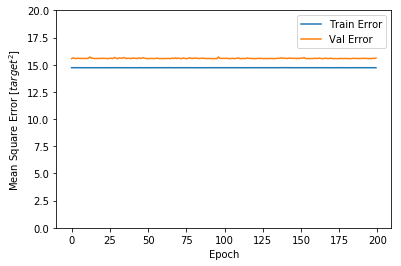

In [16]:
import matplotlib.pyplot as plt

def plot_history(history):
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$target^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,20])

plot_history(history)

In [17]:
tl = model.predict(test)

In [19]:
tl

array([[-0.17875135],
       [-0.17875135],
       [-0.17875135],
       ...,
       [-0.17875135],
       [-0.17875135],
       [-0.17875135]], dtype=float32)